# Telling Stories using Graphs


## Introduction



As data analysts or data scientists, we are not limited to only conducting data analysis -- we also need to communicate our data to an audience. 

In this lesson we will first review two main principles of good storytelling with data visualization.  

## Some Real Life and Current Examples

Before, we discussed Interactive Data Visualisation and saw how interactive data visualisations can be a powerful tool to convey as message. Let us have a look at the following examples:


1.   https://ourworldindata.org/coronavirus
2.   https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
3.   https://graphics.reuters.com/ENVIRONMENT-PLASTIC/0100B275155/index.html
4.   https://informationisbeautiful.net/beautifulnews/






## Principles of Good Story Telling


Good storytelling via data visualization has two main principles:


1. To make the information we want to convey 
 -a **salient** and (b) **relevant** to the audience.


2. To allow the audience to **accurately interpret the information we want to convey.**


There are various ways we can present data. 


The most important thing when presenting our data is highlighting the main information we want to convey so that the audience can capture it easily.


One example technique to present salient and relevant information is by using the appropriate visual mode (e.g. color, layout, size, perspective, etc.). 

As seen in the example above, pie graph allows the audience to better perceive the **proportion** of different data categories. 

## Using the Appropriate Type of Graph



Next we will go over some of the graph types we have learned so far and look at how we can improve these plots using the two principles.

## Types of Variables



The type of data determines to a large degree the plot that you will use. 




For instance, if you have a discrete data column, you will will likely not use a scatter plot, but a bar plot. 



There are roughly two types of variables (i.e. columns) in the data set:



1. **categorical variables** (blood type A, B, AB or O.; colour 'Red', 'Blue', 'Yellow');
    - binary variables ('Yes/No', 'Male/Female', 1/0);


2. **continuous variables** (numerical ranges, growth, age);


Some useful resources:

1. https://chartio.com/learn/charts/essential-chart-types-for-data-visualization/
2. https://learn.g2.com/discrete-vs-continuous-data

![title](image4.png)

https://python-graph-gallery.com/all-charts/

### Scatter Plot



A clear and concise visualization that can be used to determine the existence and type of relationship between two variables is a scatter plot. 

#### Scenario 1: Two Variables


Suppose have two variables, *City MPG* and *Highway MPG*, which are linearly correlated. 

In this scenario, a single-color two-dimensional scatter plot is adequate to represent the linear relationship of the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
vehicles = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/vehicles.csv')

In [3]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


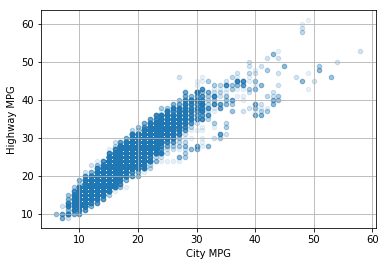

In [10]:
vehicles.plot.scatter(x="City MPG", y="Highway MPG", alpha=0.1, grid=True)

#### Scenario 2: Three Variables


In addition to *City MPG* and *Highway MPG*, suppose that we we have a third variable: **CO2 Emission Grams/Mile**. How to visualize a third **numerical** dimension in a 2-dimensional scatter plot? 

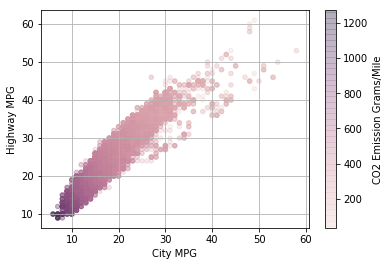

In [16]:
# Examples with pyplot
# create colour map
cmap = sns.cubehelix_palette(as_cmap=True)

# plot
vehicles.plot.scatter(x="City MPG", y="Highway MPG", c="CO2 Emission Grams/Mile", cmap=cmap, alpha=0.2, grid=True)

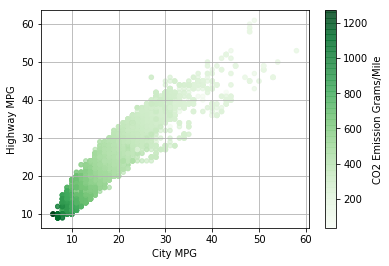

In [20]:
vehicles.plot.scatter(x="City MPG", y="Highway MPG", c="CO2 Emission Grams/Mile", cmap="Greens", alpha=0.6, grid=True)

If, on the other hand, we want to plot an additional **categorical** variable, we can simply use the hue parameter. 

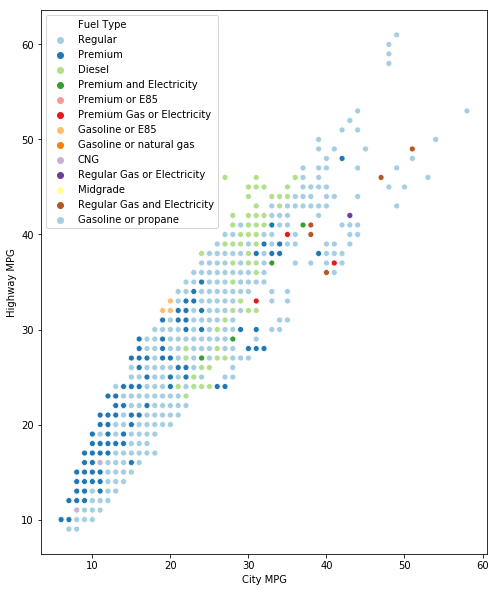

In [21]:
# Seaborn plot
plt.figure(figsize=(8,10))
sns.scatterplot(x="City MPG", y="Highway MPG", hue = "Fuel Type", data=vehicles, palette="Paired")

#### Scenario 3: More Than Three Variables


How do we visualize 9 variables in a 2-dimensional scatter plot? 

We can use a scatter plot matrix to visualize the pair-wise relationships of those variables.

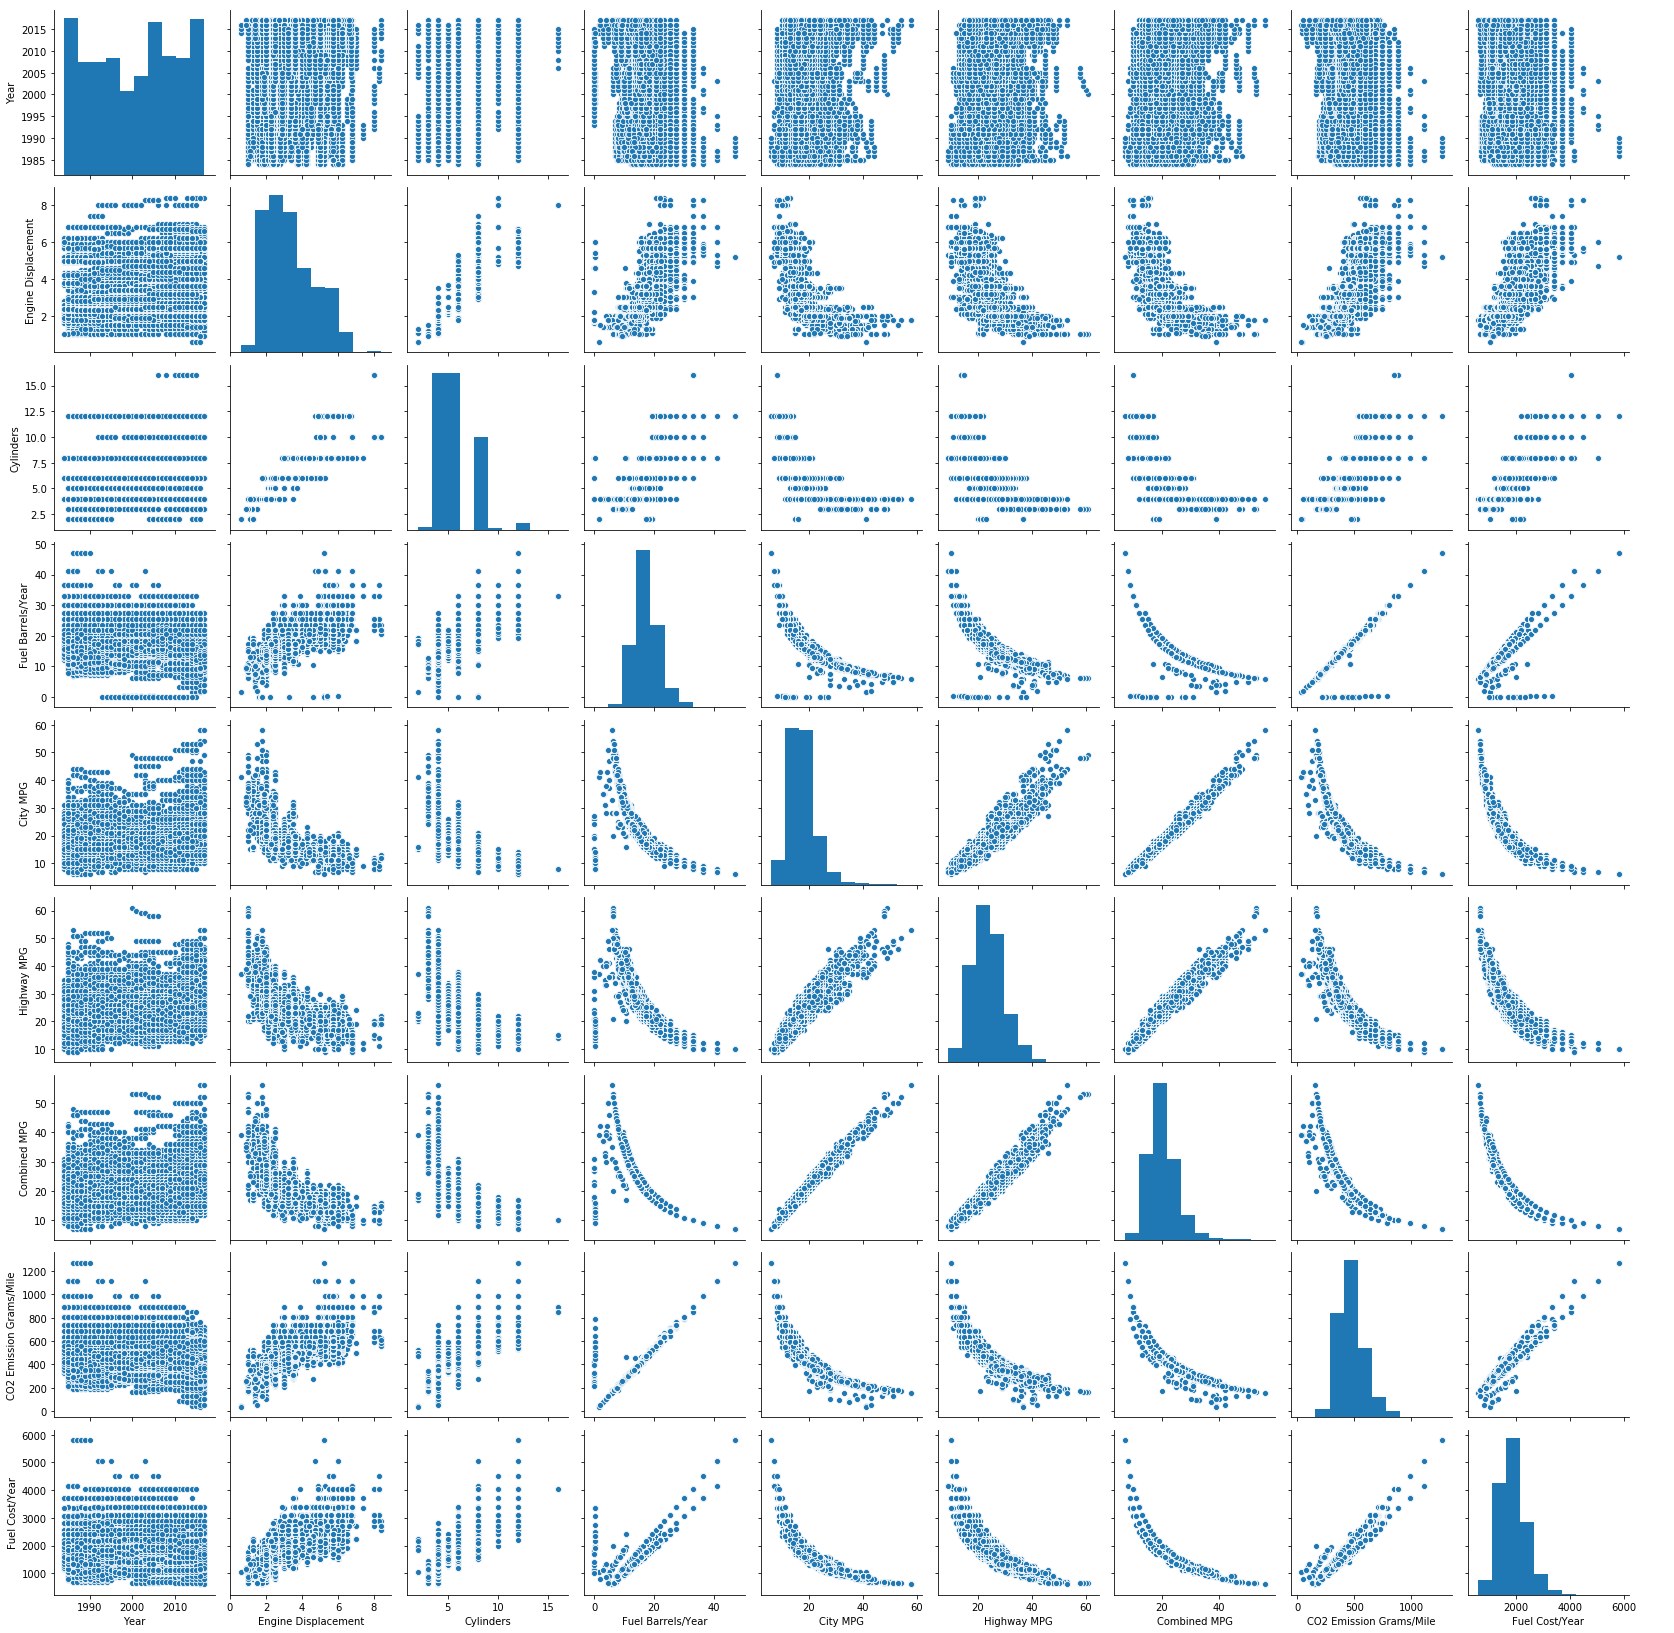

In [22]:
sns.pairplot(vehicles)

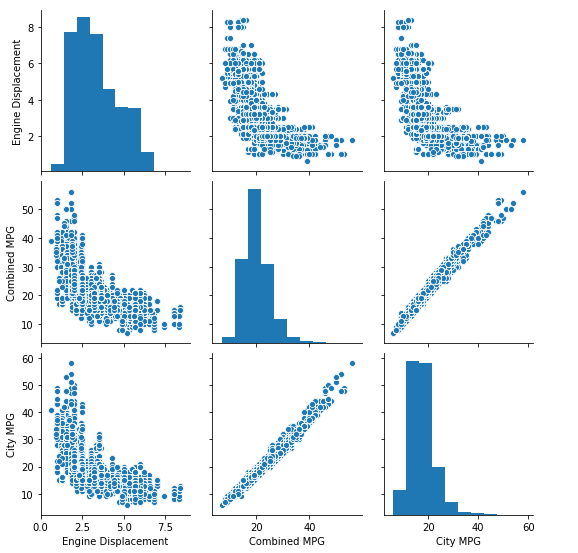

In [23]:
sns.pairplot(vehicles[["Engine Displacement", "Combined MPG", "City MPG"]])

### Emphasizing relationships






Let us now create a scatter plot whereby we emphasize not only the points, but also the relationship between the variables using a regression line.

In [31]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df.head() 

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [32]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [33]:
df = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name='B and C')
df

,A,B and C,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [35]:
vehicles[['City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile']].head()

,City MPG,Highway MPG,CO2 Emission Grams/Mile
0,18,17,522.764706
1,13,13,683.615385
2,16,17,555.437500
3,13,13,683.615385
4,14,21,555.437500


In [36]:
line_df = pd.melt(vehicles[['City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile']], id_vars='CO2 Emission Grams/Mile', var_name='MPG')
line_df

,CO2 Emission Grams/Mile,MPG,value
0,522.764706,City MPG,18
1,683.615385,City MPG,13
2,555.437500,City MPG,16
3,683.615385,City MPG,13
4,555.437500,City MPG,14
...,...,...,...
71899,244.000000,Highway MPG,38
71900,243.000000,Highway MPG,38
71901,244.000000,Highway MPG,38
71902,246.000000,Highway MPG,39


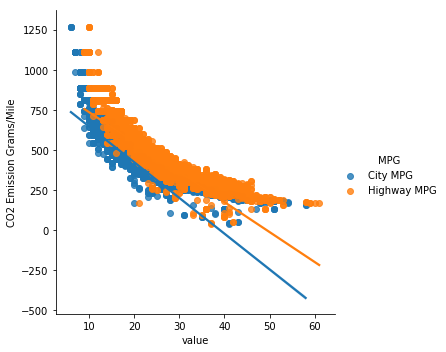

In [39]:
sns.lmplot(x='value',y='CO2 Emission Grams/Mile', hue='MPG', data=line_df, fit_reg=True) 

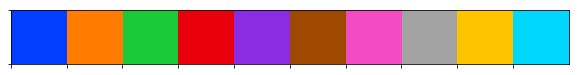

In [44]:
sns.palplot(sns.color_palette("bright", 10))

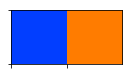

In [45]:
sns.palplot(sns.color_palette("bright", 2))

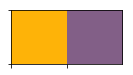

In [46]:
colours = ["amber", "dusty purple"]
sns.palplot(sns.xkcd_palette(colours))

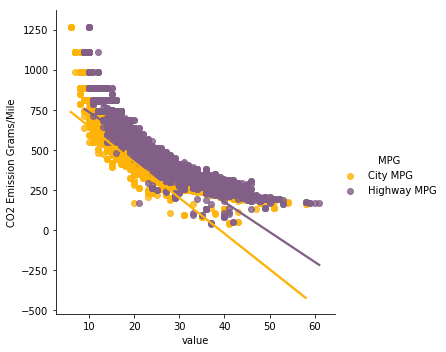

In [47]:
sns.lmplot(x='value',y='CO2 Emission Grams/Mile', hue='MPG', palette = sns.xkcd_palette(colours), data=line_df, fit_reg=True) 

## Heatmaps



We've already seen heatmaps. However, these were quite rudimentary. Seaborn helps you to also plot very detailed and clear heatmaps, instantaneously highlighting all important relationship without disregarding important information.

In [48]:
import numpy as np

In [49]:
corr = vehicles.corr()
corr

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [50]:
zeros = np.zeros((4,4))
np.triu(np.ones_like(zeros, dtype=np.bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

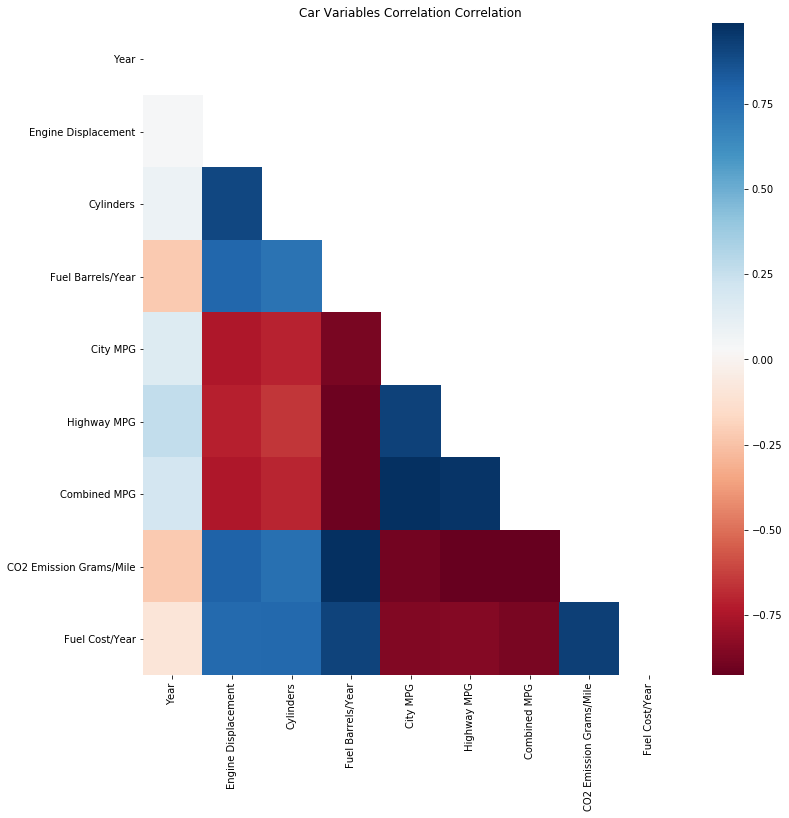

In [51]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.title("Car Variables Correlation Correlation")
sns.heatmap(corr, cmap="RdBu", mask=mask)
plt.show()

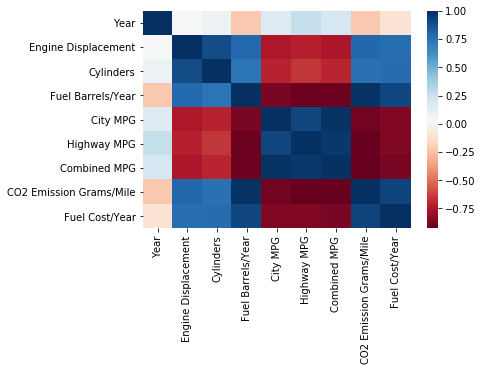

In [52]:
sns.heatmap(corr, cmap="RdBu")


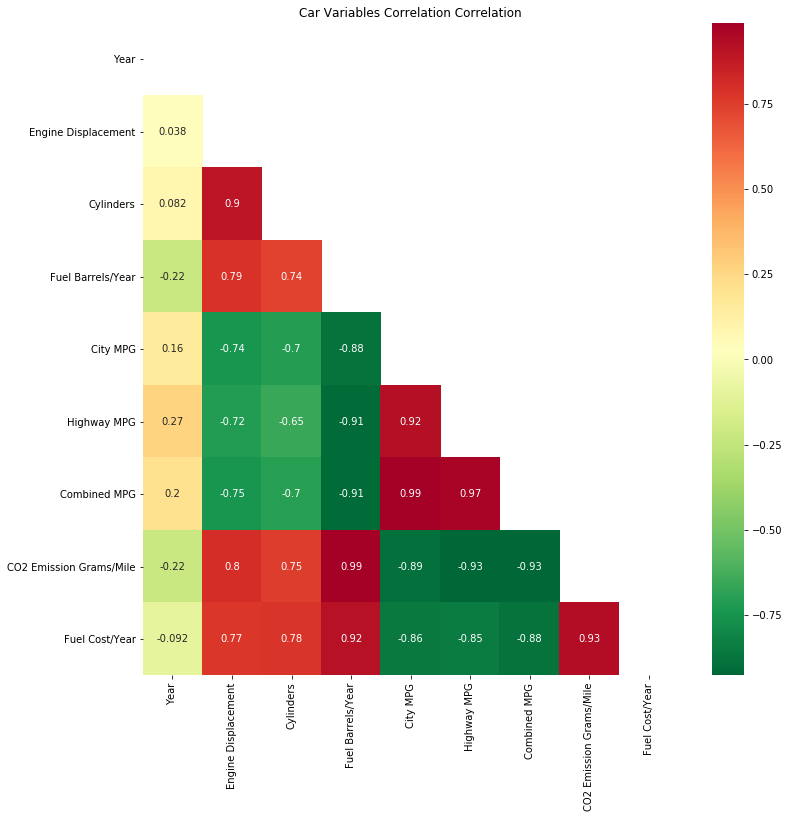

In [64]:
# Numbers in squares
# Reverse

plt.figure(figsize=(12,12))

plt.title("Car Variables Correlation Correlation")
sns.heatmap(corr, cmap="RdYlGn_r", mask=mask, annot=True)
plt.show()

## Summary


In this lesson we learnt: 

- Which visualizations to use in order to communicate our findings effectively;

- How to modify our plots and highlight specific information for our audience. 